# Submission by:
    Name: Sarthak Punjabi
    Student Number: 21183147
    Module Name: CS4168 Data Mining
    Lab Number: 1
    

# `Importing Libraries` 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold 
from sklearn import cluster 
from sklearn.cluster import KMeans
%matplotlib inline


# `Loading the Dataset`

In [15]:
df = pd.read_csv("../datasets/Bank_new.csv")
data = np.array(df.values, dtype=float)



### Getting a visual confirmation of the shape of the array.

In [16]:
data

array([[0.00000000e+00, 3.20000000e+01, 8.16666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.63262884e-01],
       [1.00000000e+00, 3.90000000e+01, 1.43333333e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.44606983e-01],
       [2.00000000e+00, 5.90000000e+01, 2.15625000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.95185360e-01],
       ...,
       [1.99700000e+03, 8.10000000e+01, 2.40416667e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.40881635e-01],
       [1.99800000e+03, 4.60000000e+01, 9.04791667e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.40881635e-01],
       [1.99900000e+03, 4.00000000e+01, 1.33395833e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.40881635e-01]])

# `Elbow method`
### **For finding out the best number of clusters**

## Elbow method is used to find the best number of clusters.
### In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


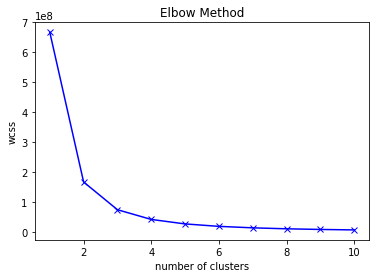

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, "bx-")
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

### From the above graph we observe that the optimal number of clusters is 3 and that is observed using the elbow method. From the point "3" the graph gets straight without any edges point the optimal number for K.

### After this we use "k-means" clustering method to visualize the clusters and get a visual confirmation.

In [18]:
K_means = 3

# `Visualizing the clusters`

### Here we create a function for plotting scatter plots with the inputs being points, labels, centers, and title. All these inputs must be provided by the user to the function to plot a scatter plot of the said cluster.

In [19]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# `Running K-Means Algo` 

### Here, we are implementing the k-means clustering algorithm and we use the default parameters but the "max-iter" parameter to 300 as the dataset that we are working on is divisible by 300 making analysis easier and efficient.

In [20]:
clustered_data_sklearn = cluster.KMeans(n_clusters=K_means, n_init=10, max_iter=300).fit(data)

# `Applying the manifold techniques and Multi Dimensional Scaling`

### Here, after creating the clusters using the K-Means Algorithm we add those clusters back to the cluster center data containing all the information about the clusters.

In [21]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

### **Applying MDS (Multi Dimensional Scaling Techniques)**

### Multidimensional scaling (MDS) is a technique that creates a map displaying the relative positions of a number of objects, given only a table of the distances between them. The map may consist of one, two, three, or even more dimensions. The program calculates either the metric or the non-metric solution.
### It Uses Stress instead of Strain so that there is as much less loss as possible thud giving a clear and precise analysis of the dataset and the scaling technique works flawlessly to provide a lossless tranformed data that is ready for the next process. 

In [22]:
XYcoordinates = manifold.MDS(n_components=3).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


### Here, we use the scatterplot function that we have developed above. In this step we provide the necessary inputs required by the function to work properly. Also, for this particular scatter plot we visualise using the MDS scaling technique.

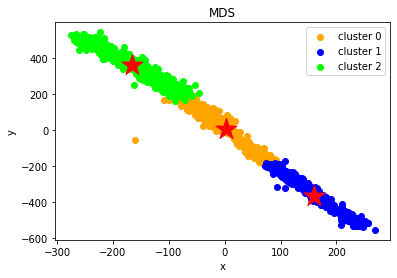

In [23]:
clustering_scatterplot(points=XYcoordinates[:-K_means,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-K_means:,:], 
                       title='MDS')

### **Testing that Again**

In [24]:
# df1 = data.reshape(1, -1) 
# means = np.array([np.mean(data[np.where(df1==i)],axis=0) for i in range(4)])
# mds_mean = manifold.MDS(3,verbose=1,eps=1e-8,n_init=8)
# mds_mean.fit(means)
# plt.scatter(mds_mean.embedding_[:,0],mds_mean.embedding_[:,1])
# plt.title("Mds of class Mean")
# plt.axis("equal")
# plt.show()


## **Applying TSNE**

### Here, we are applying another scaling technique. T-distributed Stochastic Neighbourhood Embedding (tSNE) is an unsupervised Machine Learning algorithm developed in 2008 by Laurens van der Maaten and Geoffery Hinton. It has become widely used in bioinformatics and more generally in data science to visualise the structure of high dimensional data in 2 or 3 dimensions.

### Here, we are using perplexity to firstly reduce the data loss also by using perplexity we are able to differentiate between tight clustering and loose clustering 

In [25]:
XYcoordinates = manifold.TSNE(n_components=2,perplexity=100).fit_transform(data_and_centers)
print("transformation complete")

/Users/sarthakpunjabi/Desktop/data_science_projects/classification/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sarthakpunjabi/Desktop/data_science_projects/classification/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


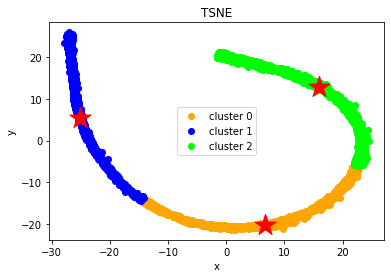

In [26]:
clustering_scatterplot(points=XYcoordinates[:-K_means,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-K_means:,:], 
                       title='TSNE')

## `Clustering Analysis`
#### Add the cluster labels as an extra column in the original dataframe


In [27]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)



In [28]:
df.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,subscribed_yes,TotalDays,cluster
0,0,32.0,0.816667,1,1.677923,2,0.939612,0,0,0,...,0,0,0,0,0,0,0,0,0.763263,1
1,1,39.0,1.433333,1,0.809651,2,0.944061,0,0,0,...,0,0,0,0,0,0,0,0,0.544607,1
2,2,59.0,2.156250,1,0.581040,2,1.155386,0,0,0,...,0,0,0,0,0,0,0,0,0.595185,1
3,3,47.0,0.829167,1,0.885044,1,1.153588,1,0,0,...,0,0,0,0,0,0,0,0,0.804609,1
4,4,54.0,2.091667,1,1.194806,1,1.270678,0,0,0,...,0,0,0,0,0,0,0,0,0.621737,1


In [29]:
df.groupby('cluster').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,subscribed_yes,TotalDays
cluster,,,,,,,,,,,,,,,,,,,,,
0,1000.0,40.719640,2.941204,14.022489,0.856444,1.935532,0.907849,0.167916,0.022489,0.019490,...,0.000000,0.013493,0.298351,0.047976,0.004498,0.000000,0.098951,0.188906,0.50075,0.649336
1,333.0,41.361319,2.135382,11.379310,0.706698,1.983508,1.132641,0.205397,0.031484,0.017991,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026987,0.001499,0.00000,0.872154
2,1666.5,43.106607,3.760032,16.156156,1.014676,1.809309,0.908383,0.073574,0.013514,0.015015,...,0.156156,0.091592,0.201201,0.054054,0.135135,0.201201,0.094595,0.475976,1.00000,0.754325


# `Conclusion`

### -Cluster 1 is having highest range of covering than cluster 0 and cluster 2
### -Education is more effective cluster than other classifiers 


il